In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import copy
from tqdm import tqdm
import Util as ut
import seaborn as sns
from DataLoader import GetSpectrum
import itertools
import clustering
from scipy import stats
from sklearn.cluster import KMeans
from statistics import mean, median,variance,stdev
import matplotlib.pyplot as plt
from IPython.display import display, HTML # Jupyter notebook用
import TrackFreq
import pyclustering
from pyclustering.cluster import xmeans


# all_source = [['IRAS15193+31', 'H2O'], ['IRAS16552-30', 'H2O'], ['IRAS18251-10', 'H2O'], ['IRAS18460-01', 'H2O'], ['IRAS18596+03', 'H2O'], ['IRAS19134+21', 'H2O'], ['IRAS19190+11', 'H2O'], ['OH16.3-3.0-3.0', 'H2O'], ['OH16.3-3.0', 'H2O'], ['W43A', 'H2O']]
all_source = [['IRAS18286-09', 'H2O']]
# all_source = [['IRAS16552-30', 'H2O']]

max_task_num = len(all_source)
result = []
result_label = []
num_cluster = {}

# def sep_data(min_val, max_val, data):
#     lim_data = []
#     for lists in data:

#         if min_val < float(lists[1]) < max_val:
#             lim_data.append(lists)
#     return lim_data

for num, source_list in enumerate(all_source):
#     print('task ' + str(num + 1) + ' / ' + str(max_task_num) + ' : ' + source_list[0] + '(' + source_list[1] + ')')
    inname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/" + source_list[0] + '_' + source_list[1] + '.txt')

    rawdata = GetSpectrum.load_file(inname)
#     rawdata = sep_data(0, 300, rawdata)
    def sp_clu(rdata, n, min_data, max_data, tol):
        #     print(data)
            x = []
            y = []
        #     for lists in data:
            def sep_data(min_val, max_val, data1):
                lim_data = []
                for lists in data1:

                    if min_val < float(lists[1]) < max_val:
                        lim_data.append(lists)
                return lim_data
        # lim_data = sep_data(125, 170)
        # lim_data = sep_data(140, 160)
#             print(data)
            data = sep_data(min_data, max_data, rdata)
            def sep_date(data):
                tmp = {}
                for lists in data:
                    if not float(lists[0]) in tmp.keys():
                        tmp[float(lists[0])] = [[float(lists[1]), float(lists[2])]]
                    else:
                        tmp[float(lists[0])].append([float(lists[1]), float(lists[2])])
                return tmp
            data = sep_date(data)
            for key in data.keys():
        #         x = np.array([[float(data[key][i][1]), float(data[key][i][0])] for i in range(0, len(data[key]))])
        #         y = np.array([float(data[key][i][1]) for i in range(0, len(data[key]))])
#                 print(data)

#                 x = np.array([[float(data[key][i][0]), float(data[key][i][1])] for i in range(0, len(data[key]))])
                x = np.array([[float(data[key][i][0]), key] for i in range(0, len(data[key]))])
                tmp_result =  x.tolist()
                init_center = pyclustering.cluster.xmeans.kmeans_plusplus_initializer(x, n).initialize()
                xm = pyclustering.cluster.xmeans.xmeans(x, init_center, ccore=True, tolerance = tol, kmax = 1000, criterion = pyclustering.cluster.xmeans.splitting_type.MINIMUM_NOISELESS_DESCRIPTION_LENGTH)
#                 xm = pyclustering.cluster.xmeans.xmeans(x, ccore=True, tolerance = tol, kmax = 60)
                xm.process()
                clusters = xm.get_clusters()
                print(xm.get_total_wce())
                i  = 0
                for c1 in clusters:
                    for c2 in c1:
                        tmp_result[c2] = [key, tmp_result[c2][0], i]
                    i += 1
                result.extend(tmp_result)
            
                num_cluster[key] = len(clusters)
#                 x = np.array([[key, float(data[key][i][0])] for i in range(0, len(data[key]))])
#                 spec = clustering.spectral()
#                 if len(x) <= n:
#                     result1, cresult, x, y , raw_cresult= spec.fit(x, len(x))
#                 else:
#                     result1, cresult, x, y , raw_cresult= spec.fit(x, n)
#                 result.extend(cresult)

#                 x_means =  clustering.XMeans(random_state = 1).fit(np.c_[x])
#                 print(x_means.labels_)
#                 print(x_means.cluster_centers_)
#                 print(x_means.cluster_log_likelihoods_)
#                 print(x_means.cluster_sizes_)
    


            return result, num_cluster

    #         fig = plt.figure(figsize = (16,24 ))
    #         ax1 = fig.add_subplot(1,1,1)
    #         ax1.scatter([float(data[key][i][0]) for i in range(0, len(data[key]))], [float(data[key][i][1]) for i in range(0, len(data[key]))], c = z)
    #         plt.show()
    #         fig = plt.figure(figsize = (16,24 ))
    #         ax1 = fig.add_subplot(1,1,1)
    #         ax1.scatter([key for i in range(0, len(data[key]))], [float(data[key][i][0]) for i in range(0, len(data[key]))], c = z)
    #         plt.show()
    #     print(result)
result, cls_num= sp_clu(rawdata, 20, 0, 300, 0.001)
print(cls_num)
# result, cls_num= sp_clu(rawdata, 30, 0, 300, 0.001)
# print(cls_num)
result, cls_num= sp_clu(rawdata, 30, 0, 300, 0.001)
print(cls_num)
# result, cls_num= sp_clu(rawdata, 2, -300, 300, 0.001)

# result, cls_num= sp_clu(rawdata, 10, -300, 300, 0.001)
# print(cls_num)
# print(result)

309.7625472991489
313.63807292847366
149.67791117156608
180.42622762562084
436.2573899390688
259.5250995779641
244.00665439848396
174.22043896182234
445.5785432436155
{58823.49024305555: 25, 58548.25373842593: 34, 58475.57439814815: 33, 58617.147372685184: 43, 58632.124768518515: 32, 58488.450694444444: 33, 58601.24428240741: 37, 58520.46325231482: 37, 58588.08284722222: 29}
91.3755491724146
212.83490349560344
91.08804719623863
133.07527565912312
109.473209365149
115.21874751737373
133.70034400024306
98.3693634953781
185.8340528774812
{58823.49024305555: 34, 58548.25373842593: 39, 58475.57439814815: 36, 58617.147372685184: 43, 58632.124768518515: 46, 58488.450694444444: 42, 58601.24428240741: 40, 58520.46325231482: 42, 58588.08284722222: 37}


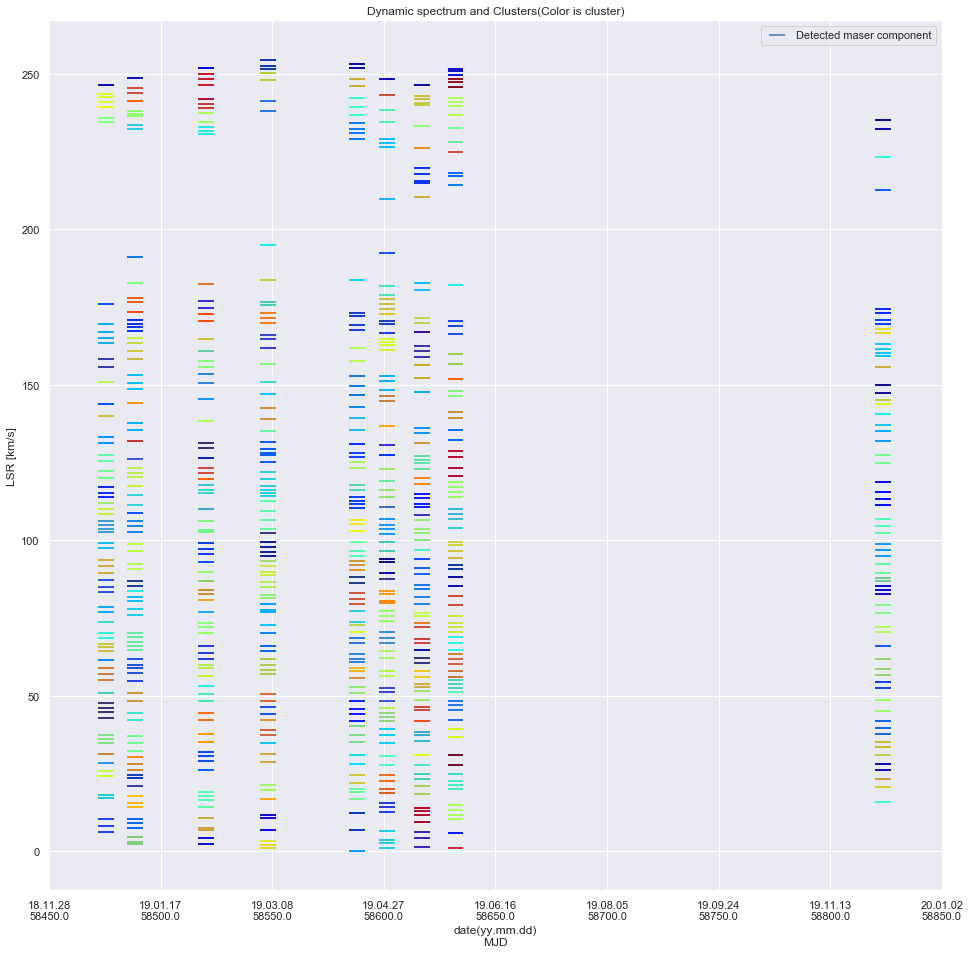

In [51]:
# lim = [100,160]
def sep_date(data):
    tmp = {}
    for lists in data:
        if not float(lists[0]) in tmp.keys():
            tmp[float(lists[0])] = [[float(lists[1]), float(lists[2])]]
        else:
            tmp[float(lists[0])].append([float(lists[1]), float(lists[2])])
    return tmp
fig = plt.figure(figsize = (16,16))
ax1 = fig.add_subplot(1,1,1)
# plt.ylim(100,200)
# plt.ylim(50,100)

x = [float(result[i][0]) for i in range(0, len(result))]
y = [float(result[i][1]) for i in range(0, len(result))]
clabel = [float(result[i][2]) for i in range(0, len(result))]
# point_x = [float(result[i][0]) for i in range(0, len(result))]
# point_y = [float(result[i][1]) for i in range(0, len(result))]
ax1.scatter(x, y, c = clabel, cmap='jet', label = 'Detected maser component', marker = '_', s = 250)
# ax1.scatter(point_x, point_y,s=50,c='k', label = 'Clusters(x valuse add 2)')

data_dic = sep_date(result)
# print(data_dic)
for key in data_dic.keys():
    tmp_label = {}
    for lis in data_dic[key]:
        if ax1.get_ylim()[0] <= lis[0] <= ax1.get_ylim()[1]:
            if not lis[1] in tmp_label.keys():
                tmp_label[lis[1]] = [lis[0]]
            else:
                tmp_label[lis[1]].append(lis[0])
#     for key2 in tmp_label.keys():
#         ax1.annotate(str(int(key2)), xy = (key, median(tmp_label[key2])), fontsize = 15)
    
ax1.set_xlabel('date(yy.mm.dd)\nMJD')
ax1.set_ylabel('LSR [km/s]')
ax1.set_title('Dynamic spectrum and Clusters(Color is cluster)')
ax1.legend()
# plt.rcParams['font.family'] = 'Times New Roman'
plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
# plt.savefig('/Users/yhamae/OneDrive/astro/FLASHING/clustering/result_spectralclustering.pdf', bbox_inches="tight")

plt.show()


P = 0.0013267804310269915, d = 1
P = 8.696260988082668e-34, d = -8
P = 7.004352026168652e-18, d = 7
P = 1.1099189036438811e-21, d = -9
P = 1.425164082740936e-21, d = 10
P = 1.3792386911927594e-18, d = 3
P = 1.7108835426513918e-53, d = -1
P = 3.701011678592673e-13, d = -7
P = 1.444980246109245e-07, d = -2
P = 2.5087823372704368e-27, d = -5
P = 7.582560427911908e-10, d = 4
P = 4.2777878689689995e-11, d = 8
P = 3.95158501041896e-19, d = 0
P = 1.5111835651733904e-34, d = 6
P = 4.527979283224615e-62, d = -1
P = 6.470234925645462e-26, d = -3
P = 6.343195121175442e-28, d = 4
P = 1.4437045551572374e-26, d = -4
P = 1.5125188821494491e-15, d = 3
P = 6.101936677605329e-13, d = 7
P = 2.539176314215008e-51, d = 10
P = 4.1900931944944e-32, d = -10
P = 6.138787977370501e-25, d = 1
P = 1.8537533430097612e-26, d = 9
P = 1.815751389441497e-47, d = -2
P = 2.77027496578412e-17, d = -9
P = 3.325664676072781e-49, d = 2
P = 4.219123161617663e-25, d = 10
P = 6.554408540191799e-31, d = 2
P = 1.0956650033262368

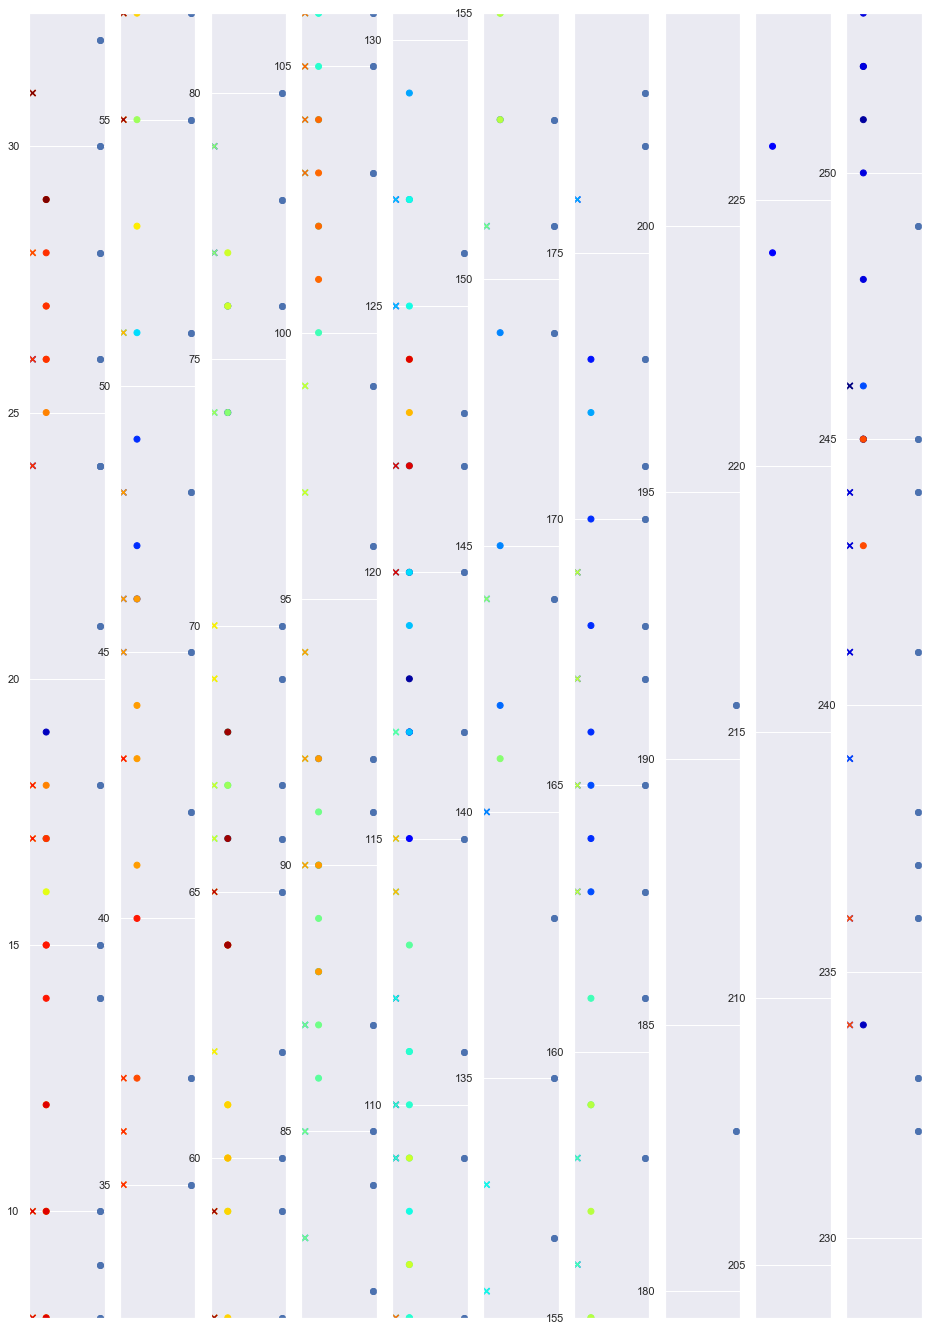

2516.0
P = 8.592166619174113e-10, d = 2
P = 2.098723252278424e-45, d = 6
P = 1.4166087866431966e-09, d = 10
P = 4.7153286973240603e-39, d = -3
P = 1.2995814250075042e-24, d = 0
P = 7.681204685202098e-15, d = -4
P = 8.584581083493782e-29, d = 2
P = 1.7346724861112408e-39, d = 5
P = 1.6472657083745679e-19, d = -3
P = 2.2583338905850285e-25, d = -9
P = 2.0611536224385583e-09, d = 3
P = 3.4187909079365115e-21, d = 7
P = 3.117533772949056e-24, d = 2
P = 2.127904904647906e-31, d = 10
P = 2.3035631938631497e-23, d = 10
P = 2.9374821117108053e-30, d = -9
P = 9.414136267376984e-26, d = 10
P = 2.732283981862417e-31, d = -4
P = 8.6440571130361e-22, d = -1
P = 3.463267189154455e-26, d = 4
P = 1.806446196545694e-16, d = 8
P = 7.720771372216983e-46, d = 5
P = 7.362997122252227e-76, d = 3
P = 1.1321480606858565e-19, d = -8
P = 2.734698291591876e-12, d = -4
P = 9.922426625012584e-27, d = -6
P = 2.8232625865731983e-34, d = -2
P = 3.65025676187427e-27, d = 5
P = 1.1321480606858562e-19, d = 10
P = 6.9144

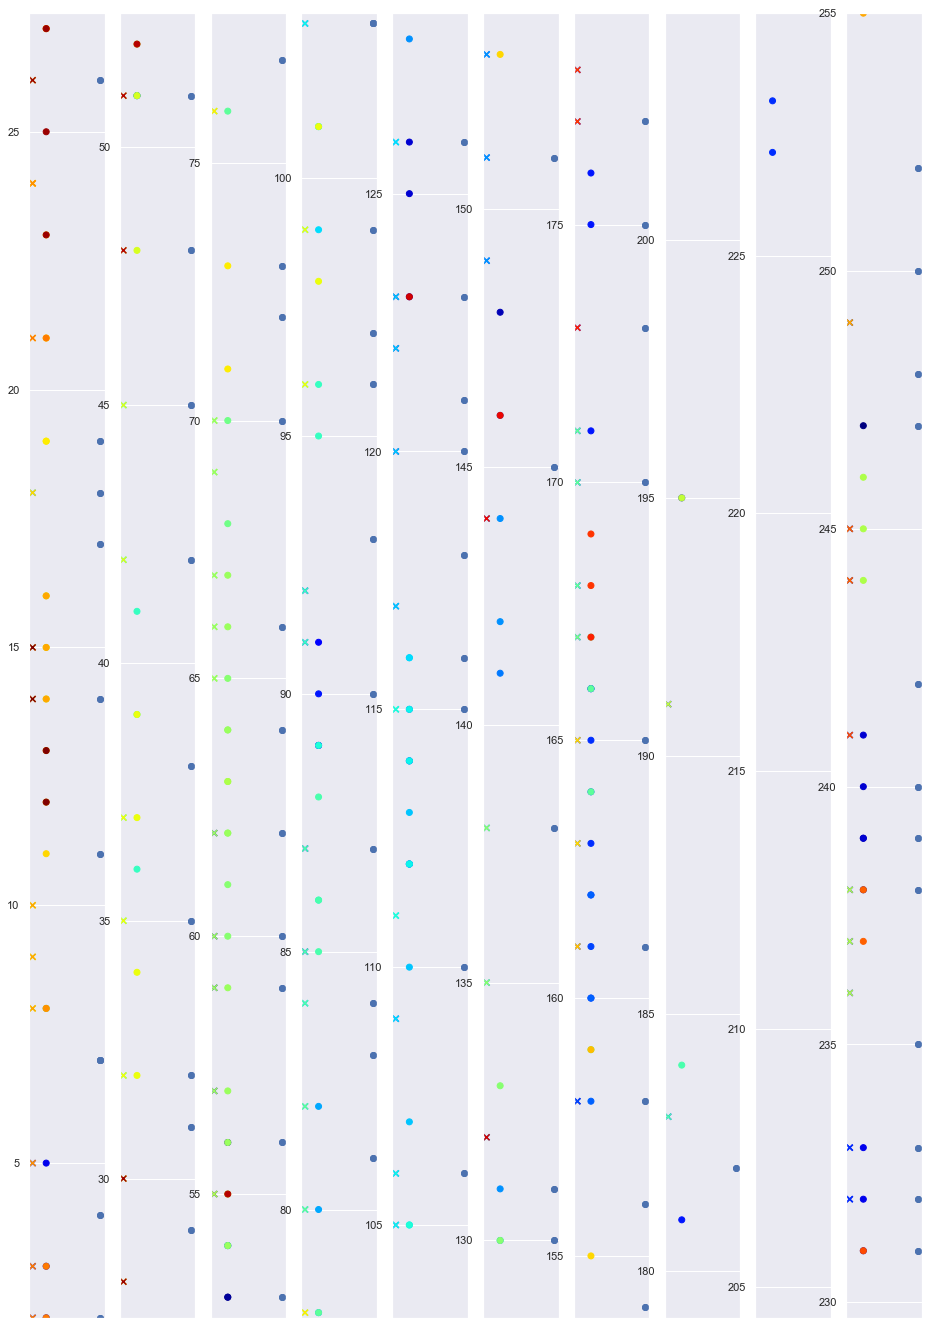

2703.0
P = 0.034218118311666046, d = -1
P = 6.51506225965753e-19, d = 3
P = 3.374885804015307e-16, d = -3
P = 5.864672148586661e-17, d = -1
P = 1.4166087866431966e-09, d = 6
P = 1.6586783589142314e-12, d = 10
P = 1.0521320473864042e-39, d = 9
P = 7.936970663188495e-18, d = 10
P = 4.8430892398787325e-30, d = -10
P = 2.4300831259329475e-05, d = 1
P = 1.817355829636919e-28, d = 8
P = 1.2577028886936916e-21, d = -1
P = 6.30511676014699e-16, d = -10
P = 3.7491594713769145e-18, d = -5
P = 4.477732441718303e-19, d = -5
P = 5.749522264293563e-19, d = 10
P = 1.5111835651733893e-34, d = 10
P = 3.76847178311086e-49, d = 0
P = 4.219123161617661e-25, d = 6
P = 1.5021118919431532e-22, d = 10
P = 4.002992601849018e-24, d = -8
P = 2.1705220113036403e-29, d = -10
P = 8.703945206726416e-15, d = -10
P = 0.0004880952435234151, d = -9
P = 7.727593625528356e-27, d = -3
P = 6.645544172915074e-17, d = 1
P = 6.645544172915073e-17, d = 8
P = 1.7940168192350882e-23, d = -3
P = 7.43368067235219e-12, d = 3
P = 2.7

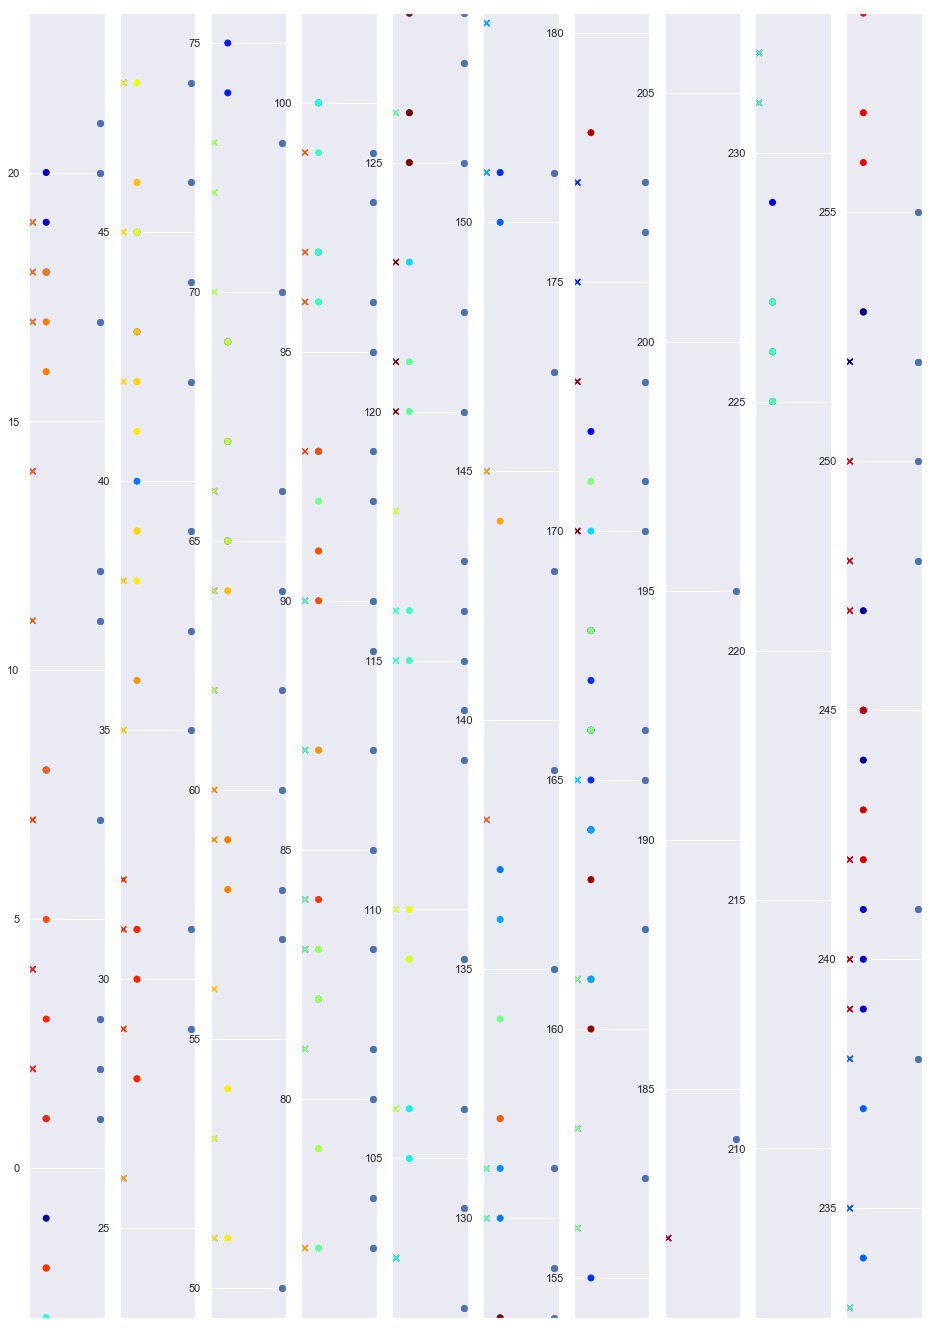

2114.0
P = 1.4226488007562864e-59, d = -6
P = 1.1478899890710554e-05, d = -9
P = 9.585732217808357e-62, d = -6
P = 5.34788876618603e-20, d = -10
P = 1.275190591487335e-07, d = -9
P = 5.1444860179702285e-05, d = -2
P = 5.211412487888541e-10, d = 10
P = 4.872338008392391e-42, d = 0
P = 3.2020024986373685e-15, d = 3
P = 1.6701700790245663e-05, d = 1
P = 2.9400777392844726e-11, d = 2
P = 2.6786369618080795e-33, d = 10
P = 1.952116713052199e-46, d = 9
P = 2.3154290882958549e-54, d = 8
P = 3.439437941040805e-33, d = 5
P = 9.794999945858153e-22, d = 9
P = 5.8543215479927644e-55, d = 3
P = 9.652144461693773e-55, d = -3
P = 5.894881686915343e-48, d = 5
P = 2.331470934428964e-47, d = 0
P = 2.059333947025054e-28, d = 0
P = 4.626830358523441e-22, d = -2
P = 4.678750301201413e-65, d = 0
P = 1.989455252152037e-63, d = -4
P = 6.515062259657526e-19, d = -5
P = 2.897198083210151e-44, d = -2
P = 8.201253044288239e-21, d = -2
P = 2.115131037591082e-19, d = -10
P = 3.098819138721827e-12, d = 1
P = 7.28772

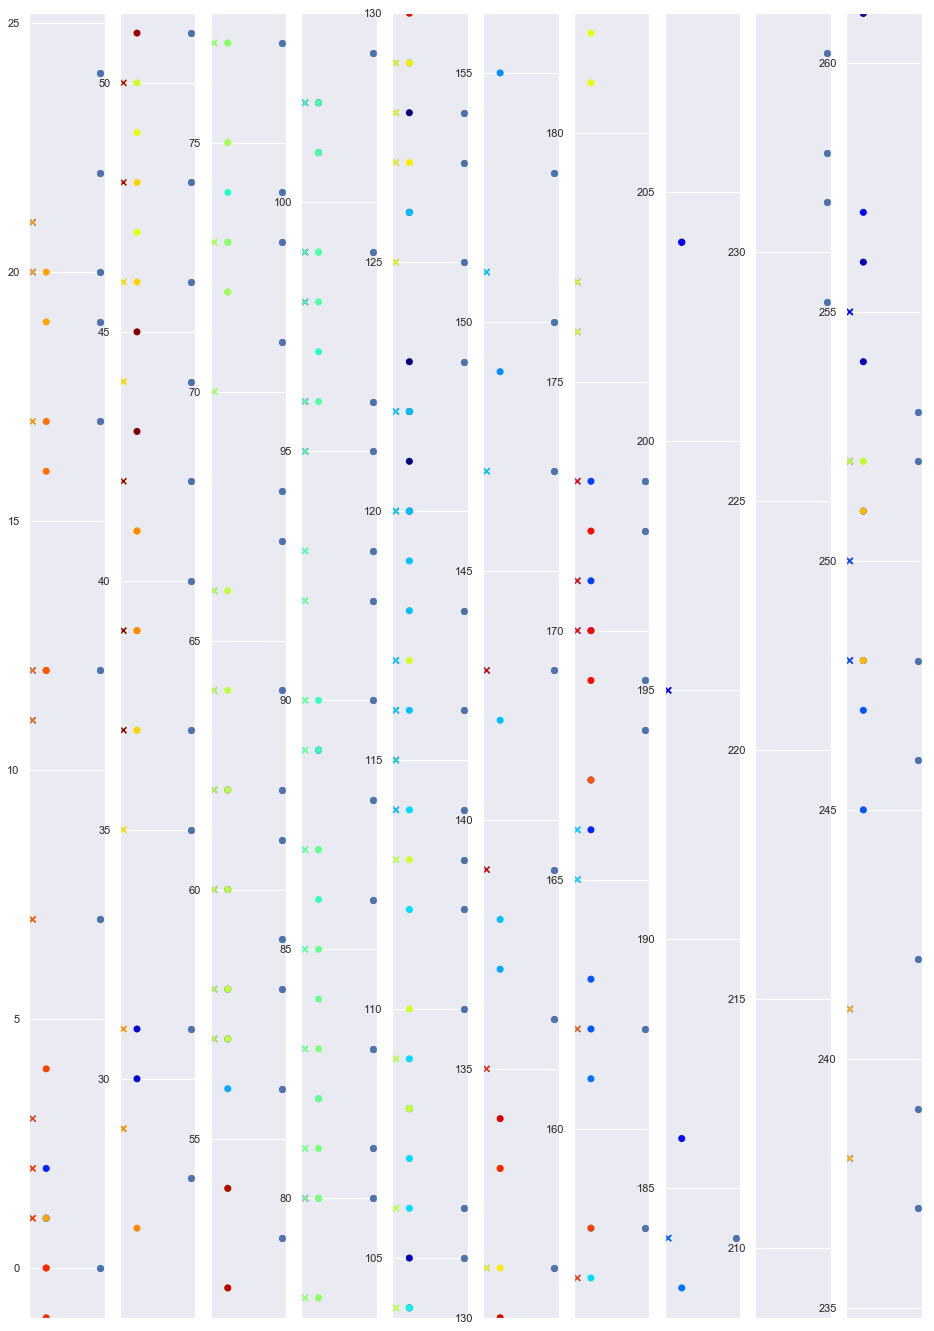

1179.0
P = 4.0307262913476275e-17, d = -9
P = 1.3521580340512203e-20, d = -5
P = 1.1321480606858565e-19, d = 6
P = 6.348800116043683e-09, d = -4
P = 3.3952676819350565e-28, d = -4
P = 1.8299469051898325e-21, d = -9
P = 8.416027156961467e-31, d = 9
P = 7.530388099325976e-17, d = -10
P = 5.274548914135017e-34, d = -3
P = 3.6534822137210456e-08, d = -7
P = 1.915478951967149e-29, d = -3
P = 2.3659776091347622e-14, d = -3
P = 1.493094676197165e-10, d = 4
P = 2.142647538416655e-24, d = 9
P = 2.3638888219442417e-33, d = 4
P = 1.1932752768550782e-20, d = 9
P = 5.206811627928078e-29, d = -6
P = 4.104196261321325e-53, d = -3
P = 2.0050087819616557e-37, d = 7
P = 6.854705794103371e-58, d = -2
P = 2.594609498276468e-11, d = 1
P = 2.185559906573192e-22, d = 5
P = 5.238257017524758e-41, d = 0
P = 3.237933746014467e-58, d = 4
P = 1.1994219623473793e-51, d = -4
P = 2.7820866247602895e-67, d = 0
P = 1.2641814475388338e-52, d = 6
P = 1.3971817036635575e-23, d = 8
P = 2.6283637069436884e-16, d = 3
P = 1.

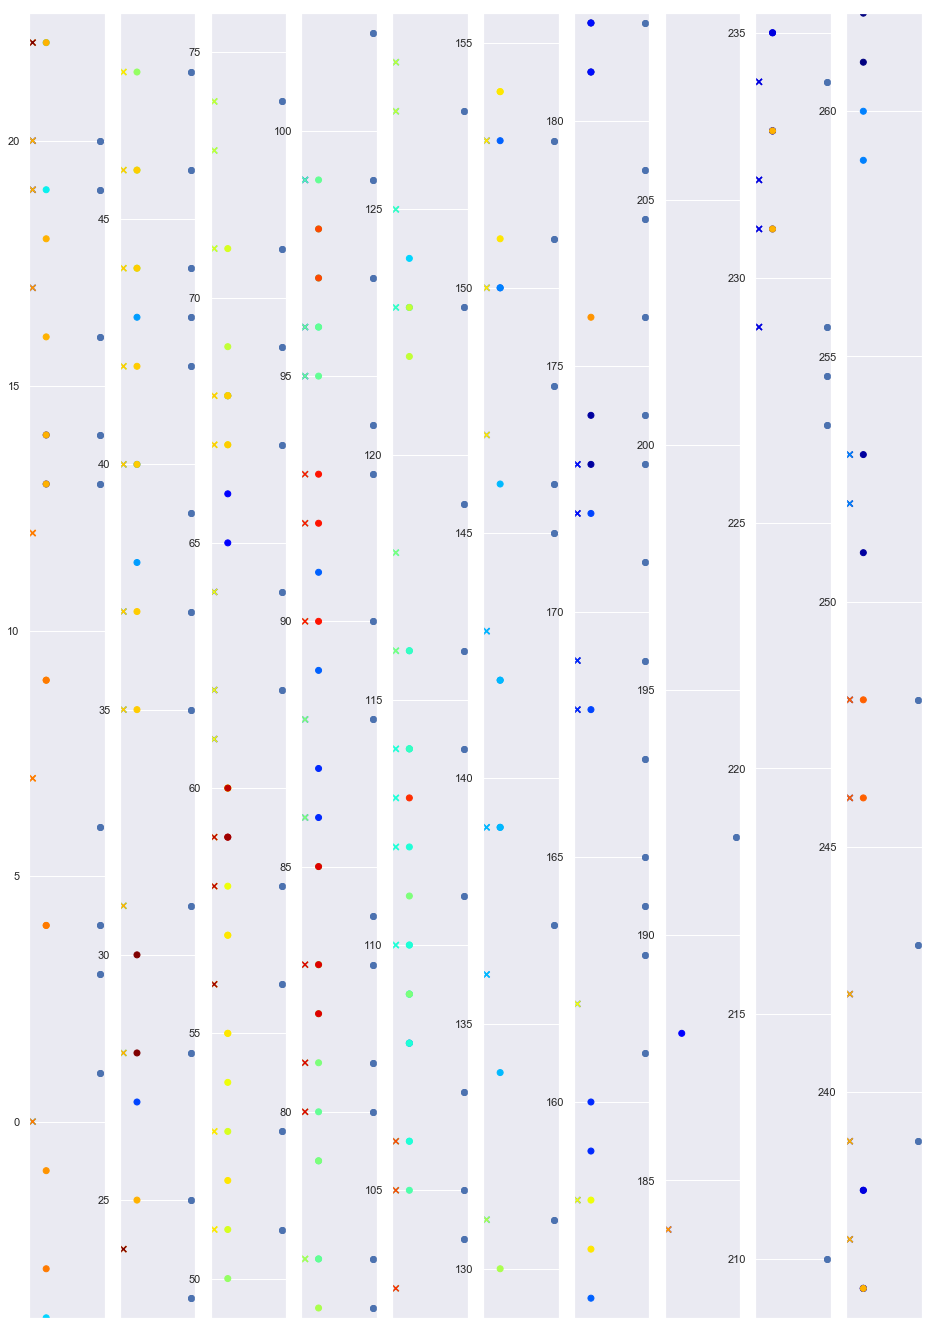

1557.0
P = 1.2577028886936917e-21, d = -3
P = 4.508755242294827e-12, d = 5
P = 5.144486017970229e-05, d = 2
P = 4.910429870159117e-16, d = -4
P = 1.6052280551856123e-09, d = -8
P = 5.306403388120996e-46, d = 7
P = 2.6283637069436884e-16, d = 1
P = 1.6572140060412723e-31, d = 7
P = 1.6134967524342878e-40, d = 1
P = 4.658886145103398e-15, d = 1
P = 5.894881686915336e-48, d = 10
P = 1.581816556228457e-42, d = 10
P = 2.271972599665251e-37, d = 0
P = 3.0747805528152014e-38, d = 9
P = 7.281290178321648e-33, d = -2
P = 2.200701987975367e-15, d = -6
P = 7.991959892953935e-11, d = -5
P = 7.095474162284707e-23, d = 0
P = 9.922426625012584e-27, d = 7
P = 1.532195784587021e-20, d = 7
P = 3.647034157595651e-46, d = 1
P = 8.466853895418334e-43, d = 8
P = 1.8173558296369188e-28, d = -6
P = 5.23825701752476e-41, d = -2
P = 1.614922475724294e-21, d = 10
P = 2.0611536224385583e-09, d = -1
P = 1.1399918530443558e-12, d = 5
P = 2.3335310764194425e-28, d = -8
P = 7.882359790600855e-25, d = -2
P = 1.6586783

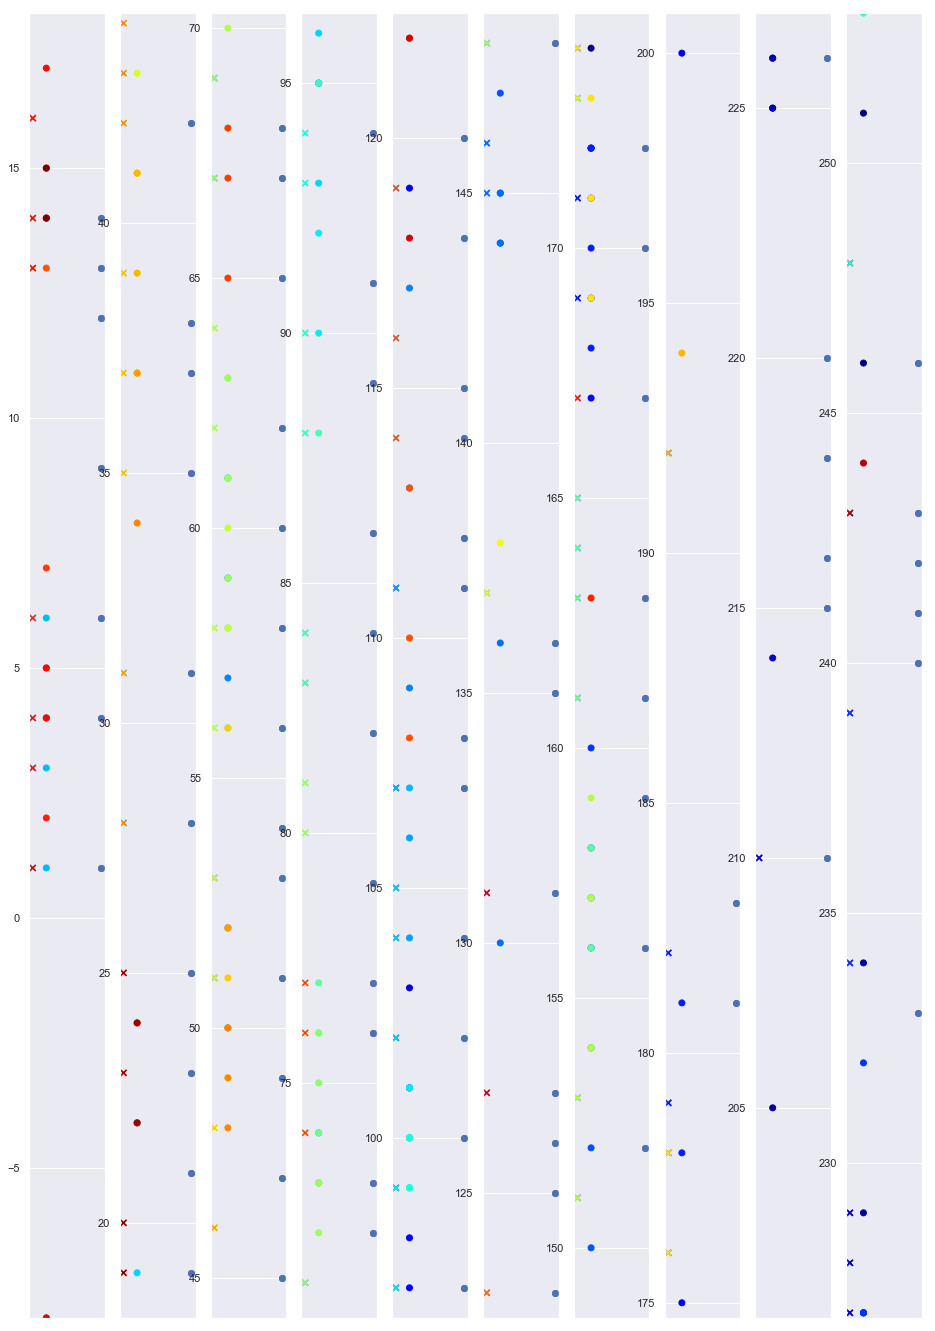

893.0
P = 2.1574923126757816e-17, d = 6
P = 1.6038108905486393e-28, d = 9
P = 1.4611950812632058e-50, d = -3
P = 5.56424601126394e-16, d = -10
P = 2.9198483321679152e-18, d = -2
P = 0.778800783071405, d = 0
P = 1.1698459177061971e-22, d = -3
P = 3.5817479302831815e-10, d = 0
P = 1.177950889828277e-15, d = 10
P = 1.2077318443756867e-44, d = 9
P = 6.515062259657525e-19, d = 7
P = 1.2415511035985842e-16, d = -1
P = 1.6686955807649093e-24, d = -8
P = 6.3871422930584235e-21, d = 9
P = 1.3336148155022622e-34, d = 8
P = 1.7816729631100145e-30, d = -10
P = 6.685678470164928e-29, d = -6
P = 2.3925274093921553e-57, d = -2
P = 1.6261110446178192e-14, d = 6
P = 5.940967779046553e-22, d = 8
P = 1.942112687900023e-15, d = 0
P = 6.299550330831478e-35, d = 3
P = 1.0741521727433008e-18, d = 9
P = 6.101936677605326e-13, d = 8
P = 1.9810087980489801e-13, d = 5
P = 1.965641444214537e-39, d = 6
P = 1.2664165549094179e-14, d = -4
P = 7.004352026168648e-18, d = -2
P = 1.2740647981735328e-26, d = 1
P = 5.9409

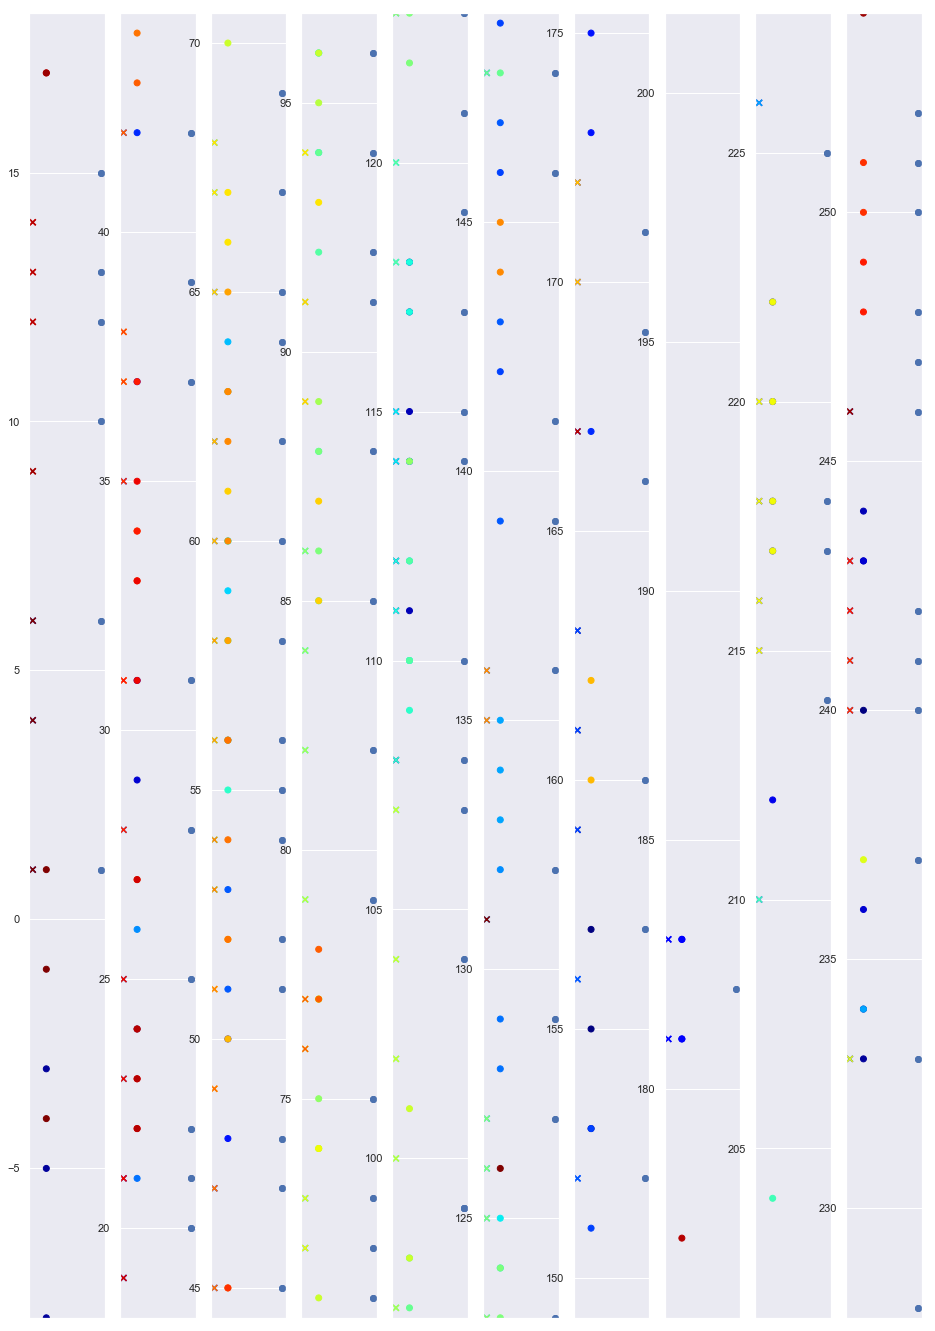

739.0


IndexError: list index out of range

In [70]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
def compare_lis(lisA, lisB, sigma, AminusB, lim = 30):
    def bin_to_f(lists, sigma):
        def gaussian(x, sigma):
#             print(math.exp(-1 * (x*x) / (2 * sigma*sigma)))
            return math.exp(-1 * (x*x) / (2 * sigma*sigma))
#         return_lis = [float(val) for val in lists]
        return_lis = [0] * len(lists)
        for i in range(len(lists)):
#             print(i)
            if lists[i] == 1:
                if return_lis[i] == 0:
                    return_lis[i] = gaussian(0, sigma)
                else:
                    return_lis[i] *= gaussian(0, sigma)
                for j in range(-1 * i, len(lists) - i):

                    if j == 0: continue
#                     if gaussian(lists[i + j] - lists[i], sigma) <= 0.01: continue
                    if math.fabs(j) <= sigma * 4:
#                         print(i + j)
                        if return_lis[i + j] == 0:
                            return_lis[i + j] = gaussian(j, sigma)
                        else:
                            return_lis[i + j] *= gaussian(j, sigma)
#             for j in range(-1, -1 * i - 1, -1):
# #                 print(i,j)
#                 if gaussian(lists[i + j] - lists[i], sigma) <= 0.01: break
#                 return_lis[i + j] *= gaussian(lists[i + j] - lists[i], sigma)
#         print(return_lis, len(return_lis))
        return return_lis
    
    lis2 = bin_to_f(lisB, sigma)
#     print(lis2)
    diff = []
#     print(len(lisB), len(lisA))
    for i in range(0, len(lisB) - len(lisA) + 1):
        tmp_diff = 1
#         print(AminusB)
        if math.fabs(i - AminusB) <= lim:
            for j in range(len(lisA)):
    #             print(j)
#                 print(str(lis2[j + i]) + '*' + str(lisA[j]))
                if lisA[j] != 0:
                    tmp_diff *= lis2[j + i] * lisA[j]
#                 print(tmp_diff)
            diff.append([tmp_diff, i - AminusB])
#         print(diff)
#     print(len(diff))
#     max_val = max(diff, key=lambda x:x[0])
    max_val = diff[0]
    tmp_max_lis = []
    for tmp_lis in diff:
#         print(tmp_lis)
        if tmp_lis[0] > max_val[0]:
            max_val = tmp_lis
        elif max_val[0] == tmp_lis[0] and math.fabs(tmp_lis[1]) <= math.fabs(max_val[1]):
            max_val = tmp_lis
#         if tmp_lis[0] == max_val[0]:
#             tmp_max_lis.append(tmp_lis)
    return max_val, diff

def peaklist_to_peakfunc(lis):
    lists = sorted(lis)
#     lists = [int(val) for val in in_lists]
    return_lists = [0] * (max(lists) - min(lists) + 1)
#     print(len(return_lists))
    for i in range(max(lists) - min(lists) + 1):
        if i + min(lists) in lists:
#             print(i)
            return_lists[i] = 1
#             return_lists[i] = lists[i]
    return return_lists
        
    
data = dict(sorted(sep_date(result).items(), key=lambda x:x[0]))
data_keys = list(data.keys())
# print(data)
# for i in range(1, len(data_keys)):
for key in data.keys():
    for i in range(len(data[key])):
        data[key][i][0] = int(Decimal(str(data[key][i][0])).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    





for i in range(1, len(data_keys)):
# for i in range(0, 1):
    x1 = []
    y1 = []
    y1_raw = []
    clabel1 = []
    max_diff_list = []
    data_cluster_num = {}   
    for lis in data[data_keys[i - 1]]:
#     for lis in data[data_keys[i]]:
        if not lis[1] in data_cluster_num.keys():
            data_cluster_num[lis[1]] = [lis[0]]
        else:
            data_cluster_num[lis[1]].append(lis[0])
    j = 0
    B = peaklist_to_peakfunc([s[0] for s in data[data_keys[i]]])
#     print(B, len(B))
    centB = min([s[0] for s in data[data_keys[i]]])
#     print('B = ' + str(centB))
    for key, lis in data_cluster_num.items():
        centA = min(lis)
#         print('A = ' + str(centA))
        A = peaklist_to_peakfunc(lis)
#         print(A)
#         print('cA-cB = ' + str(centA - centB))
        diff, diff_lis = compare_lis(A, B, 2, centA - centB, 10)
        max_diff_list.append(diff[0])
        print('P = ' + str(diff[0]) + ', ' + 'd = ' + str(diff[1]))
        if not diff[0] == 0:
#             x1.extend([data_keys[i - 1]] * len(lis))
            x1.extend([data_keys[i] - 1] * len(lis))
            y1.extend([lis[i] - float(diff[1]) for i in range(0, len(lis))])
            y1_raw.extend([lis[i] for i in range(0, len(lis))])
            clabel1.extend([j] * len(lis))  
        j += 1
        
    print('Average P = ' + str(sum(max_diff_list) / len(max_diff_list)))

    fig = plt.figure(figsize = (16,24))

    ax = []
    n = 10
    for j in range(0, n):
        ren = (max(y1) - min(y1)) / n
        ax.append(fig.add_subplot(1,n,j + 1))
        ax[j].set_ylim(min(y1) + ren * j, min(y1) + ren + ren * j)
        ax[j].scatter([s + 0.2 for s in x1], y1, c = clabel1, cmap = 'jet')
        ax[j].scatter(x1, y1_raw, c = clabel1, cmap = 'jet', marker = 'x')
#         ax[j].quiver(x1, y1_raw, [0.2 for s in x1], [t-s for s,t in zip(y1_raw, y1)],angles = 'xy', scale_units = 'xy', scale = 1)
        x2 = [data_keys[i]] * len(data[data_keys[i]])
        y2 = [float(s[0]) for s in data[data_keys[i]]]
        ax[j].scatter(x2, y2)
        ax[j].set_xticks([])
#     plt.tick_params(labelbottom=False)

    plt.show()
    df = 0
    for x, y in zip(sorted(y1), sorted(y2)):
    #     print(x,y)
        df += math.fabs(y - x)
    print(df)


        
            
